## DreliaCalc Report

In [1]:
import arrow; print(arrow.now('Europe/Vienna').format('DD.MM.YYYY - HH:mm'))

27.02.2022 - 19:28


In [2]:
import dmyplant2
import pandas as pd
import numpy as np
from tabulate import tabulate
from pprint import pprint as pp

In [3]:
# load input data from files
dval = dmyplant2.Validation.load_def_csv("out.csv")
failures = dmyplant2.Validation.load_failures_csv("failures.csv")
psize = (12,8)

## Validation Engines:

In [4]:
dmyplant2.cred()
mp = dmyplant2.MyPlant(600)
vl = dmyplant2.Validation(mp,dval, cui_log=False) 
d = vl.dashboard                  

1275it [00:00, 2362.54it/s]                   


In [5]:
mp.fetch_available_data()

{'dataItems': [{'id': 18180, 'name': 'Para_Island_Limit_LSdSpeedLimit'},
  {'id': 10008855, 'name': 'Para_ModulControler_Ctr30_t_period_up'},
  {'id': 69, 'name': 'Hyd_PressCoolWat', 'unit': 'bar'},
  {'id': 10000302, 'name': 'Para_Gas_Pr_GasPrAbsActive'},
  {'id': 1019355, 'name': 'RMD_BlowByFilterOPHEventLast'},
  {'id': 10001382, 'name': 'Para_Hydraulic_Oil_GenOilSkid_Flow_OilSkid_DE_Hi'},
  {'id': 10009070, 'name': 'SlowDownTime09'},
  {'id': 19204, 'name': 'PBC_HeatCharVar_Cyl11', 'unit': '°CA'},
  {'id': 20194, 'name': 'Ignition_SAFI_SW_Vers6', 'unit': 'float'},
  {'id': 1019877, 'name': 'PMax_Spread', 'unit': 'bar'},
  {'id': 10000549, 'name': 'Para_Cylinder_Ignition_MORIS_SparkChar4_Current'},
  {'id': 17671, 'name': 'Para_Hyd_CoolWat_Press_Limit1', 'unit': 'bar'},
  {'id': 1040216, 'name': 'spark_plug_rul_at_maintenance_11', 'unit': 'oph'},
  {'id': 1040185, 'name': 'spark_plug_maintenance_IV04', 'unit': 'kV'},
  {'id': 1040074,
   'name': 'valverecession_cyl17_deltaOphSinceIn

In [6]:
vl.quick_report()

51 Engines / 1036 PU's in Validation Fleet.

35 Validation Engines UP and Running
15 Validation Engines not Running:
 1 Validation Engine(s) with unknown Running Condition:

  15243 fleet leader oph
   8295 50% quantile / median oph
   8344 average oph
  12766 average of top ten oph
   3926 average of last ten oph

 425554 cumulated oph


Engines without contact:



Engines not running:



Engines with Alarm FLag != 0 or Tripped condition:


Name      id  Count_OpHour  Power_PowerAct  \
0            1386177 ABINSK  130891       17088.0             0.0   
1   1393153 BLESSED TEXTILE  129039       21632.0             0.0   
8     1393378 KAMAL LIMITED  129046       23303.0          2405.0   
40              1338846 SKY  115670       25260.0             0.0   

   OperationalCondition  Various_Bits_CollAlarm  
0            No Contact                     1.0  
1             Available                     1.0  
8               Running                     1.0  
40        Not Available                     1.0

## Success Run Plot, beta=1.21 & 1.5 with failures 

In [7]:
from tabulate import tabulate
print(tabulate(failures, headers=failures.columns))

    date                   failures    serialNumber  comment
--  -------------------  ----------  --------------  -----------------------------------------------------------------------------------------------------------------
 0  2020-12-28 00:00:00           1         1319151  München V008 M1 Z8 - Reiber, mit Boroskop am 28.12.2020 festgestellt, Cold Scuff, Motor lief 431 Stunden nach BSI


/Users/dieterchvatal/opt/anaconda3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 1.
  for label in axis.get_ticklabels()])
/Users/dieterchvatal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 1.
  fig.canvas.print_figure(bytes_io, **kw)


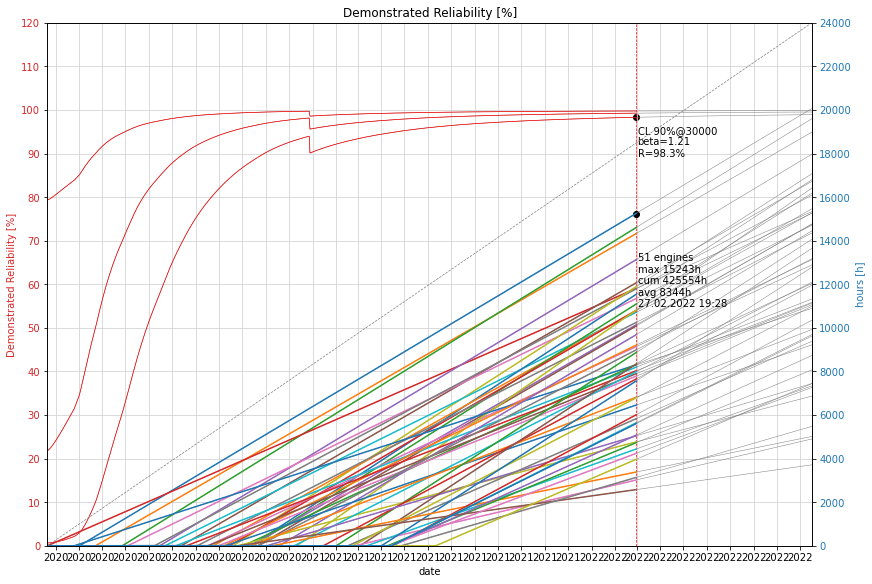

/Users/dieterchvatal/opt/anaconda3/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py:234: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 1.
  for label in axis.get_ticklabels()])
/Users/dieterchvatal/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 1.
  fig.canvas.print_figure(bytes_io, **kw)


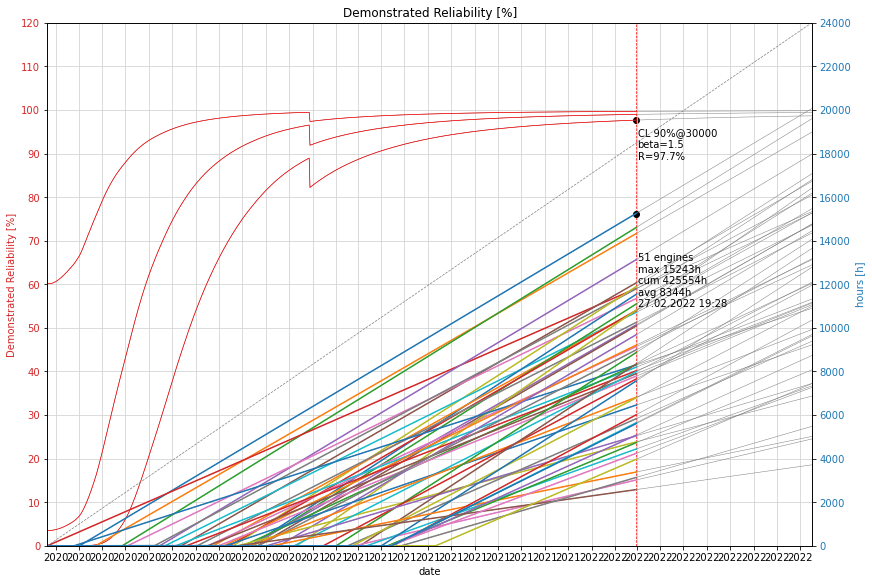

In [8]:
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.21, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.3);
dmyplant2.demonstrated_Reliabillity_Plot(vl, 
            beta=1.5, T=30000, s=1000, ft=failures, cl=[10,50,90], factor=1.3);

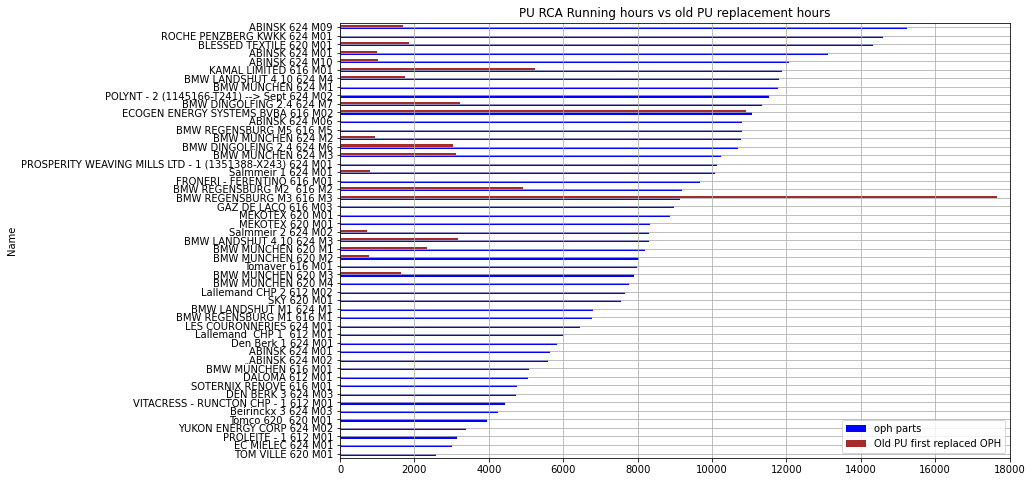

In [9]:
dd = d[['Name','oph parts','BMEP', 'LOC','Engine Type','Engine ID']].copy()
dd['Name'] = d['Name'] + ' ' + d['Engine Type'] + ' ' + d['Engine ID']
dc =  pd.concat([dd, dval[['Old PU first replaced OPH','Old PUs replaced before upgrade']]],axis=1).set_index('Name').sort_values(by = "oph parts",ascending=True)
dc.plot.barh(y=['oph parts','Old PU first replaced OPH'],figsize=psize, xlim=(0,18000), color=['blue','brown'], grid=True, title="PU RCA Running hours vs old PU replacement hours");


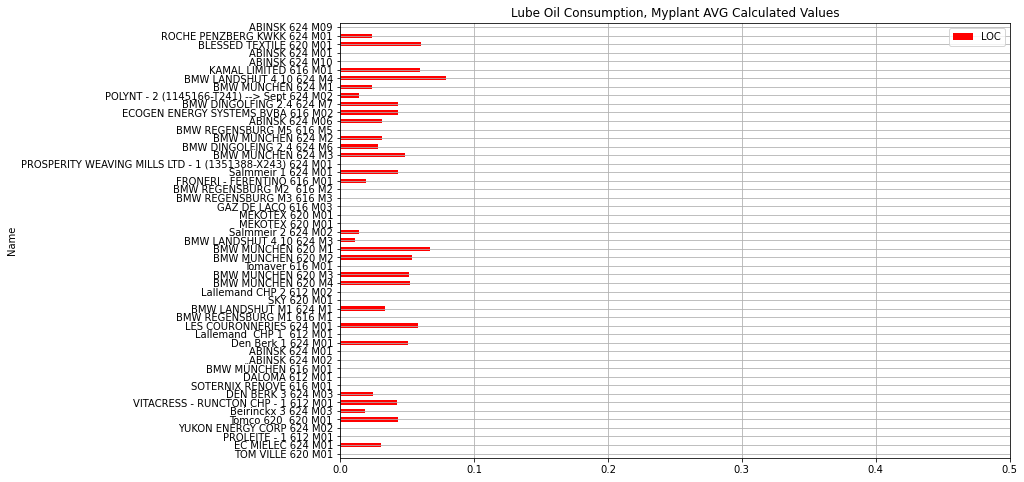

In [10]:
dc.plot.barh(y=['LOC'],figsize=psize, xlim=(0,0.5), color=['red'], grid=True, title='Lube Oil Consumption, Myplant AVG Calculated Values');


## Detailed plot

In [11]:
# Remove the semicolon on the next line to see all serial numbers
d[['Name','Engine Type','Engine ID','serialNumber']].sort_values(by='Name');

In [12]:

e=dmyplant2.Engine.from_sn(mp,1184199)
print(f"{e}")
e.dash

1184199 ROCHE PENZBERG KWKK


{'Name': 'ROCHE PENZBERG KWKK',
 'Engine ID': 'M01',
 'Design Number': 'U233',
 'Engine Type': '624',
 'Engine Version': 'H02',
 'P': 24,
 'P_nom': 4404.0,
 'BMEP': 24.0,
 'serialNumber': '1184199',
 'id': 108532,
 'Count_OpHour': 39803.0,
 'val start': Timestamp('2020-04-27 00:00:00'),
 'oph@start': 25208,
 'oph parts': 14595.0,
 'LOC': 0.024}

In [13]:
dtrips = e.batch_hist_alarms(p_severities=[800], p_offset=0, p_limit=5)
dtrips['datetime'] = pd.to_datetime(dtrips['timestamp'] * 1000000.0).dt.strftime("%m-%d-%Y %H:%m")
print(tabulate(dtrips[['datetime', 'message', 'name','severity']]))


-  ----------------  -------------------------------------------------------------------------------  ----  ---
0  02-24-2022 15:02  Fail safe loop tripped                                                           1056  800
1  02-24-2022 15:02  Emergency stop / safety loop                                                     1031  800
2  02-10-2022 13:02  Jacket water pressure low                                                        1019  800
3  02-03-2022 16:02  Measuring signal failure charge temperature before high-pressure turbocharger B  2222  800
4  02-03-2022 15:02  Measuring signal failure charge temperature before high-pressure turbocharger A  2221  800
-  ----------------  -------------------------------------------------------------------------------  ----  ---


In [14]:
dtrips = e.batch_hist_alarms(p_severities=[600], p_offset=0, p_limit=10)
dtrips['datetime'] = pd.to_datetime(dtrips['timestamp'] * 1000000.0).dt.strftime("%m-%d-%Y %H:%m:%S")
print(tabulate(dtrips[['datetime', 'message', 'name','severity']]))

-  -------------------  --------------  ----  ---
0  02-27-2022 18:02:00  Hourly message  9007  600
1  02-27-2022 17:02:00  Hourly message  9007  600
2  02-27-2022 16:02:01  Hourly message  9007  600
3  02-27-2022 15:02:01  Hourly message  9007  600
4  02-27-2022 14:02:00  Hourly message  9007  600
5  02-27-2022 13:02:00  Hourly message  9007  600
6  02-27-2022 12:02:00  Hourly message  9007  600
7  02-27-2022 11:02:01  Hourly message  9007  600
8  02-27-2022 10:02:01  Hourly message  9007  600
9  02-27-2022 09:02:00  Hourly message  9007  600
-  -------------------  --------------  ----  ---


In [16]:
import arrow
data = ['Count_OpHour','Power_PowerAct','Hyd_PressCrankCase','Hyd_PressOilDif']
dset = [
    {'col':['Power_PowerAct'], 'ylim':(0,5000)},
    {'col':['Hyd_PressCrankCase'],'ylim': [-100, 40]},
    {'col':['Hyd_PressOilDif'], 'ylim':(0,2)},
    {'col':['Oph_parts']}
]

df0 = e.hist_data(
    itemIds= e.get_dataItems(data), 
    p_from=arrow.get(e.val_start).to('Europe/Vienna'), 
    #p_from=arrow.get(e['val start']).to('Europe/Vienna'), 
    p_to=arrow.now('Europe/Vienna'),
    timeCycle=600,
    forceReload=False
)

# Set Type of time column to DateTime
df0['Oph_parts'] = df0.Count_OpHour - e.oph_start


In [17]:
df = e.hist_data(
    itemIds= e.get_dataItems(data), 
    p_from=arrow.get(e.valstart_ts), 
    p_to=arrow.get(e.valstart_ts), 
    timeCycle=30,
    forceReload=False
)
df

Empty DataFrame
Columns: []
Index: []

In [18]:
dmyplant2.dbokeh_chart(
    df0, dset, title = e, figsize=psize)

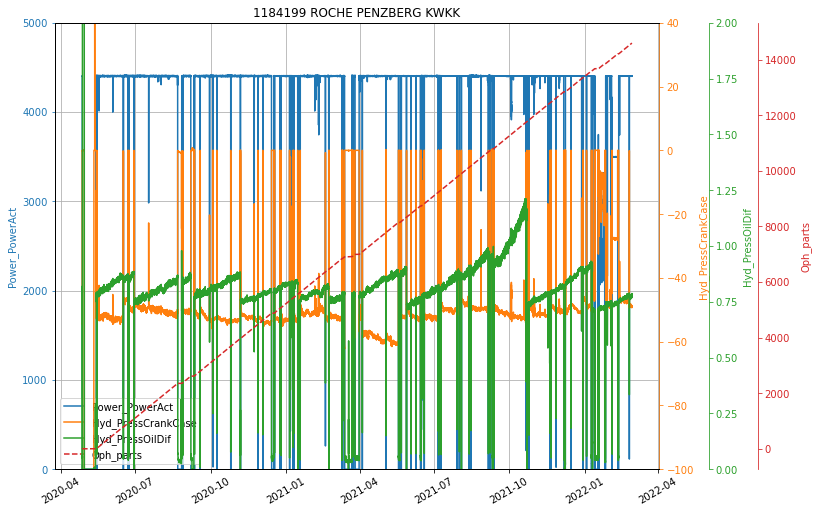

In [21]:
dmyplant2.chart( df0, dset, title = e, figsize=psize);

LOC, all available data received,
Data Start 27.06.2016
Val  Start 27.04.2020


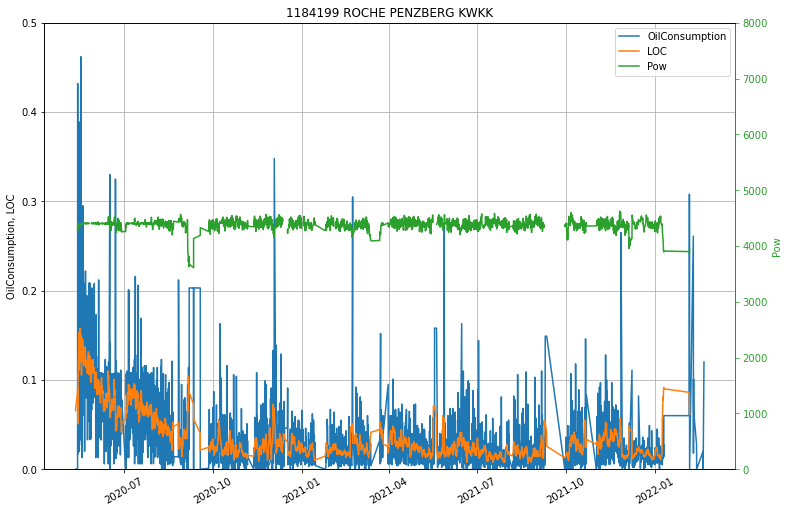

In [23]:
# Lube Oil Consuption data
dloc = e.Validation_period_LOC()

dmyplant2.chart(dloc, [
    {'col': ['OilConsumption','LOC'],'ylim': (0,0.5)},
    {'col': ['Pow'],'ylim': (0,8000)},
],
title = e,
figsize = psize);

In [29]:
%%time
# exit for the moment, because code does make sense for now.
import sys
#sys.exit(0)

dat = {
    161: ['CountOph','h'], 
    102: ['PowerAct','kW'],
    107: ['Various_Values_SpeedAct','rpm'],
    217: ['Hyd_PressCrankCase','mbar'],
    16546: ['Hyd_PressOilDif','bar']
}

dset2 = [
    {'col': ['PowerAct'],'ylim': [0, 5000]},
    {'col': ['Various_Values_SpeedAct'],'ylim': [0, 2500], 'color':'darkblue'},
    {'col': ['CountOph'],'ylim': [0, 500]},
    {'col': ['Hyd_PressCrankCase'],'ylim': [-80, 60]},
    {'col': ['Hyd_PressOilDif'],'ylim': [0, 2]}
]

df2 = e.hist_data(
    itemIds=dat, 
    #p_from=arrow.get('2021-03-05 05:28').to('Europe/Vienna'),
    p_from=arrow.get(e.valstart_ts),
    #p_to=arrow.get('2021-03-05 05:30').to('Europe/Vienna'),
    p_to=arrow.now(),
    timeCycle=60)


# Set Type of time column to DateTime
df2['CountOph'] = df2.CountOph - e.oph_start
print(f"Number of Data points: {df2['datetime'].count()}")

Load Data: 20000 datarows [00:00, 28724.61 datarows/s]                          


Number of Data points: 967362
CPU times: user 2.99 s, sys: 221 ms, total: 3.21 s
Wall time: 4.07 s


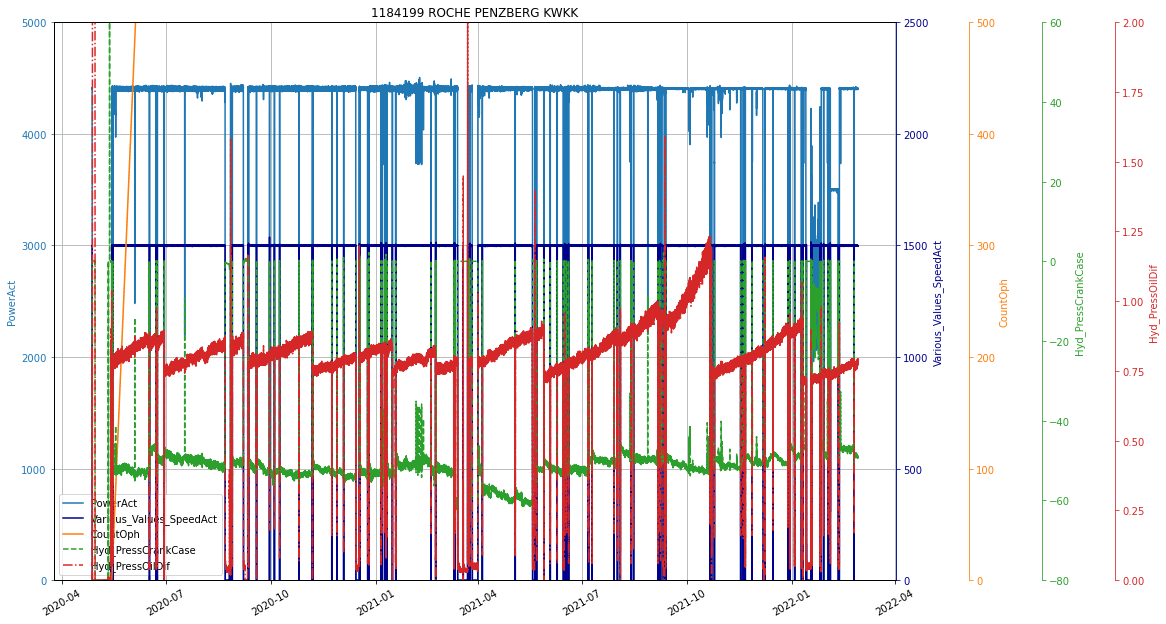

In [30]:
# exit for the moment, because code does make sense for now.
import sys
#sys.exit(0)

dmyplant2.chart(df2, dset2, x = 'datetime', title = e, grid = True, figsize = (18,10));

In [31]:
%%time
#lindex = df2['time'].values.searchsorted(1618856220030)
%timeit df2['CountOph'].iloc[df2['time'].values.searchsorted(1600000000000)]

11.7 µs ± 84 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
CPU times: user 9.44 s, sys: 144 ms, total: 9.58 s
Wall time: 9.57 s
